# **Monty K Vasita**

Setting up libraries, logging, and pandas display — no data insights yet, just environment setup

In [57]:

# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='app.log',
    format='%(asctime)s - %(levelname)s - %(message)s')

In [58]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Loading Data Set

In [59]:
# DataSet 
url="https://raw.githubusercontent.com/MontyVasita18/CodeB_Internship/refs/heads/main/dataset_phishing.csv"
df=pd.read_csv(url)
df.sample(frac=1) # To make the code execution faster

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
4505,https://www.iconfinder.com/search/?q=parking,44,18,0,2,0,0,1,0,0,1,0,0,0,4,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.00,0,0,0,0,0,2,0,0,0,0,0,0,5,3,1,3,1,10,10,7,5.4,6.5,4.666667,0,0,0,0,0,0,137,0.919708,0.080292,0,1,0,0.363636,0,0.000000,0,1,60.000000,0,100.000000,0.000000,0,0,0,65.000000,0,0,0,0,0,0,942,5997,5471,0,0,7,legitimate
7500,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.259259,0.00,0,0,0,0,0,2,0,0,0,0,1,0,5,4,2,3,2,32,19,32,13.2,11.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,76,5767,0,0,1,2,phishing
8559,https://www.komikgue.com/,25,16,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.00,0,0,0,0,0,2,0,0,0,0,1,0,2,3,3,3,0,8,8,0,5.5,5.5,0.000000,0,0,0,0,0,0,8,0.750000,0.250000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,100.000000,0,0,0,66.666667,0,0,0,0,0,0,289,1172,1512979,0,0,2,legitimate
8257,https://www.inopressa.ru/,25,16,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.00,0,0,0,0,0,2,0,0,0,0,0,0,2,4,3,3,0,9,9,0,6.0,6.0,0.000000,0,0,0,0,0,0,128,0.906250,0.093750,0,0,0,0.333333,0,0.500000,0,1,44.444444,0,75.000000,25.000000,0,0,0,0.000000,0,0,0,0,0,0,98,7588,50395,0,0,5,legitimate
54,http://www.astroresidential.co.uk/application/...,51,26,0,3,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.00,0,0,0,0,0,3,0,0,0,0,4,0,4,4,3,3,4,16,16,11,8.5,9.5,7.500000,0,0,0,0,0,0,91,0.615385,0.384615,0,2,0,0.142857,0,0.085714,0,1,28.571429,0,38.461538,61.538462,0,0,0,50.000000,0,0,0,1,1,0,137,1690,0,0,1,2,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,https://623112j4j3.codesandbox.io/index.html,44,25,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.181818,0.32,0,0,0,0,1,3,0,0,0,0,0,0,4,1,4,10,4,11,11,5,7.5,10.5,4.500000,0,0,0,0,0,0,8,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,0,0,0,122,1338,22211,0,1,6,phishing
474,https://www.wunderground.com/us/ca/fontana,42,20,0,2,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.00,0,0,0,0,0,2,0,0,0,0,1,0,5,3,2,3,2,12,12,7,5.2,7.5,3.666667,0,0,0,0,0,0,144,0.986111,0.013889,0,0,0,0.500000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,0,251,9247,1299,0,0,6,legitimate
5848,http://www.businessdictionary.com/definition/r...,74,26,0,3,3,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.00,0,0,0,0,0,3,0,0,0,0,0,0,8,6,3,3,3,18,18,10,7.0,10.5,5.833333,0,


# 📊 Exploratory Data Analysis (EDA)

Checking shape, data types, and missing values. The dataset looks clean, with no major null-value issues. That means no need for imputation or heavy cleaning

In [60]:
df.shape

(11430, 89)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [62]:
# Checking Null Value in DataSet
df.isnull().sum()/len(df)*100

url                           0.0
length_url                    0.0
length_hostname               0.0
ip                            0.0
nb_dots                       0.0
nb_hyphens                    0.0
nb_at                         0.0
nb_qm                         0.0
nb_and                        0.0
nb_or                         0.0
nb_eq                         0.0
nb_underscore                 0.0
nb_tilde                      0.0
nb_percent                    0.0
nb_slash                      0.0
nb_star                       0.0
nb_colon                      0.0
nb_comma                      0.0
nb_semicolumn                 0.0
nb_dollar                     0.0
nb_space                      0.0
nb_www                        0.0
nb_com                        0.0
nb_dslash                     0.0
http_in_path                  0.0
https_token                   0.0
ratio_digits_url              0.0
ratio_digits_host             0.0
punycode                      0.0
port          

Summary statistics show how features are spread. You can spot skewed distributions and outliers (e.g., long URLs, high digit ratio).

In [63]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

Separating numerical and categorical columns. Then, for each numeric feature, you analyze spread, skewness, and outliers — very helpful for choosing scaling techniques or detecting which features might need transformation.

In [64]:
# Spliting data into Numerical Data and Catagorical Data
numerical_data=df.select_dtypes(exclude='object')
numerical_data

categorical_data=df.select_dtypes(include='object')

In [65]:
from collections import OrderedDict
stats=[]

for col in df.columns:
    if df[col].dtype !='object':
        numerical_stats=OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()


        })
        stats.append(numerical_stats)
report=pd.DataFrame(stats)
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis
0,length_url,12.0,1.641000e+03,61.126684,26.0,33.000000,71.000000,38.000000,5.529732e+01,8.085190,144.196391
1,length_hostname,4.0,2.140000e+02,21.090289,16.0,15.000000,24.000000,9.000000,1.077717e+01,5.160078,69.829931
2,ip,0.0,1.000000e+00,0.150569,0.0,0.000000,0.000000,0.000000,3.576436e-01,1.954418,1.820067
3,nb_dots,1.0,2.400000e+01,2.480752,2.0,2.000000,3.000000,1.000000,1.369686e+00,5.718117,66.155843
4,nb_hyphens,0.0,4.300000e+01,0.997550,0.0,0.000000,1.000000,1.000000,2.087087e+00,4.695239,40.696686
5,nb_at,0.0,4.000000e+00,0.022222,0.0,0.000000,0.000000,0.000000,1.554999e-01,8.272893,95.457038
6,nb_qm,0.0,3.000000e+00,0.141207,0.0,0.000000,0.000000,0.000000,3.644558e-01,2.488737,6.060591
7,nb_and,0.0,1.900000e+01,0.162292,0.0,0.000000,0.000000,0.000000,8.213374e-01,9.725295,139.140959
8,nb_or,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
9,nb_eq,0.0,1.900000e+01,0.293176,0.0,0.000000,0.000000,0.000000,9.983172e-01,6.530036,70.909580


Several features showed significant skewness, suggesting non-normal distributions.

Wide ranges and high standard deviations in some columns (e.g., web_traffic, length_url) indicate the presence of outliers.

Features with high kurtosis are likely to have heavy tails or sharp peaks.

Checking frequency counts for categorical columns — this helps you see whether categories are balanced or dominated by one class (like the target label status).

In [66]:
# Frequency Distribution
for col in df.columns:
    if df[col].dtype=='object':
        print(f"Frequency Distribution Of {col}\n")
        print(df[col].value_counts)

Frequency Distribution Of url

<bound method IndexOpsMixin.value_counts of 0                    http://www.crestonwood.com/router.php
1        http://shadetreetechnology.com/V4/validation/a...
2        https://support-appleld.com.secureupdate.duila...
3                                       http://rgipt.ac.in
4        http://www.iracing.com/tracks/gateway-motorspo...
                               ...                        
11425        http://www.fontspace.com/category/blackletter
11426    http://www.budgetbots.com/server.php/Server%20...
11427    https://www.facebook.com/Interactive-Televisio...
11428               http://www.mypublicdomainpictures.com/
11429    http://174.139.46.123/ap/signin?openid.pape.ma...
Name: url, Length: 11430, dtype: object>
Frequency Distribution Of status

<bound method IndexOpsMixin.value_counts of 0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishi

In [67]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

The target column status is well-balanced, which is ideal for binary classification models and ensures fair learning across both classes.

In [68]:
df['status'].mode()

0    legitimate
1      phishing
Name: status, dtype: object

Label encoding turns 'legitimate' and 'phishing' into 0 and 1 — readying the target for machine learning models.

In [69]:
# Encoding Target column
df['status']=df['status'].replace({'legitimate':0,'phishing':1})
df['status']

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

The target variable status was originally categorical, labeled as “phishing” and “legitimate.” It was converted into a binary format (1 and 0) for model compatibility.

# Histogram

Histograms Reveal skewed features and possible outliers. Some features like web_traffic or length_url may need scaling or normalization.

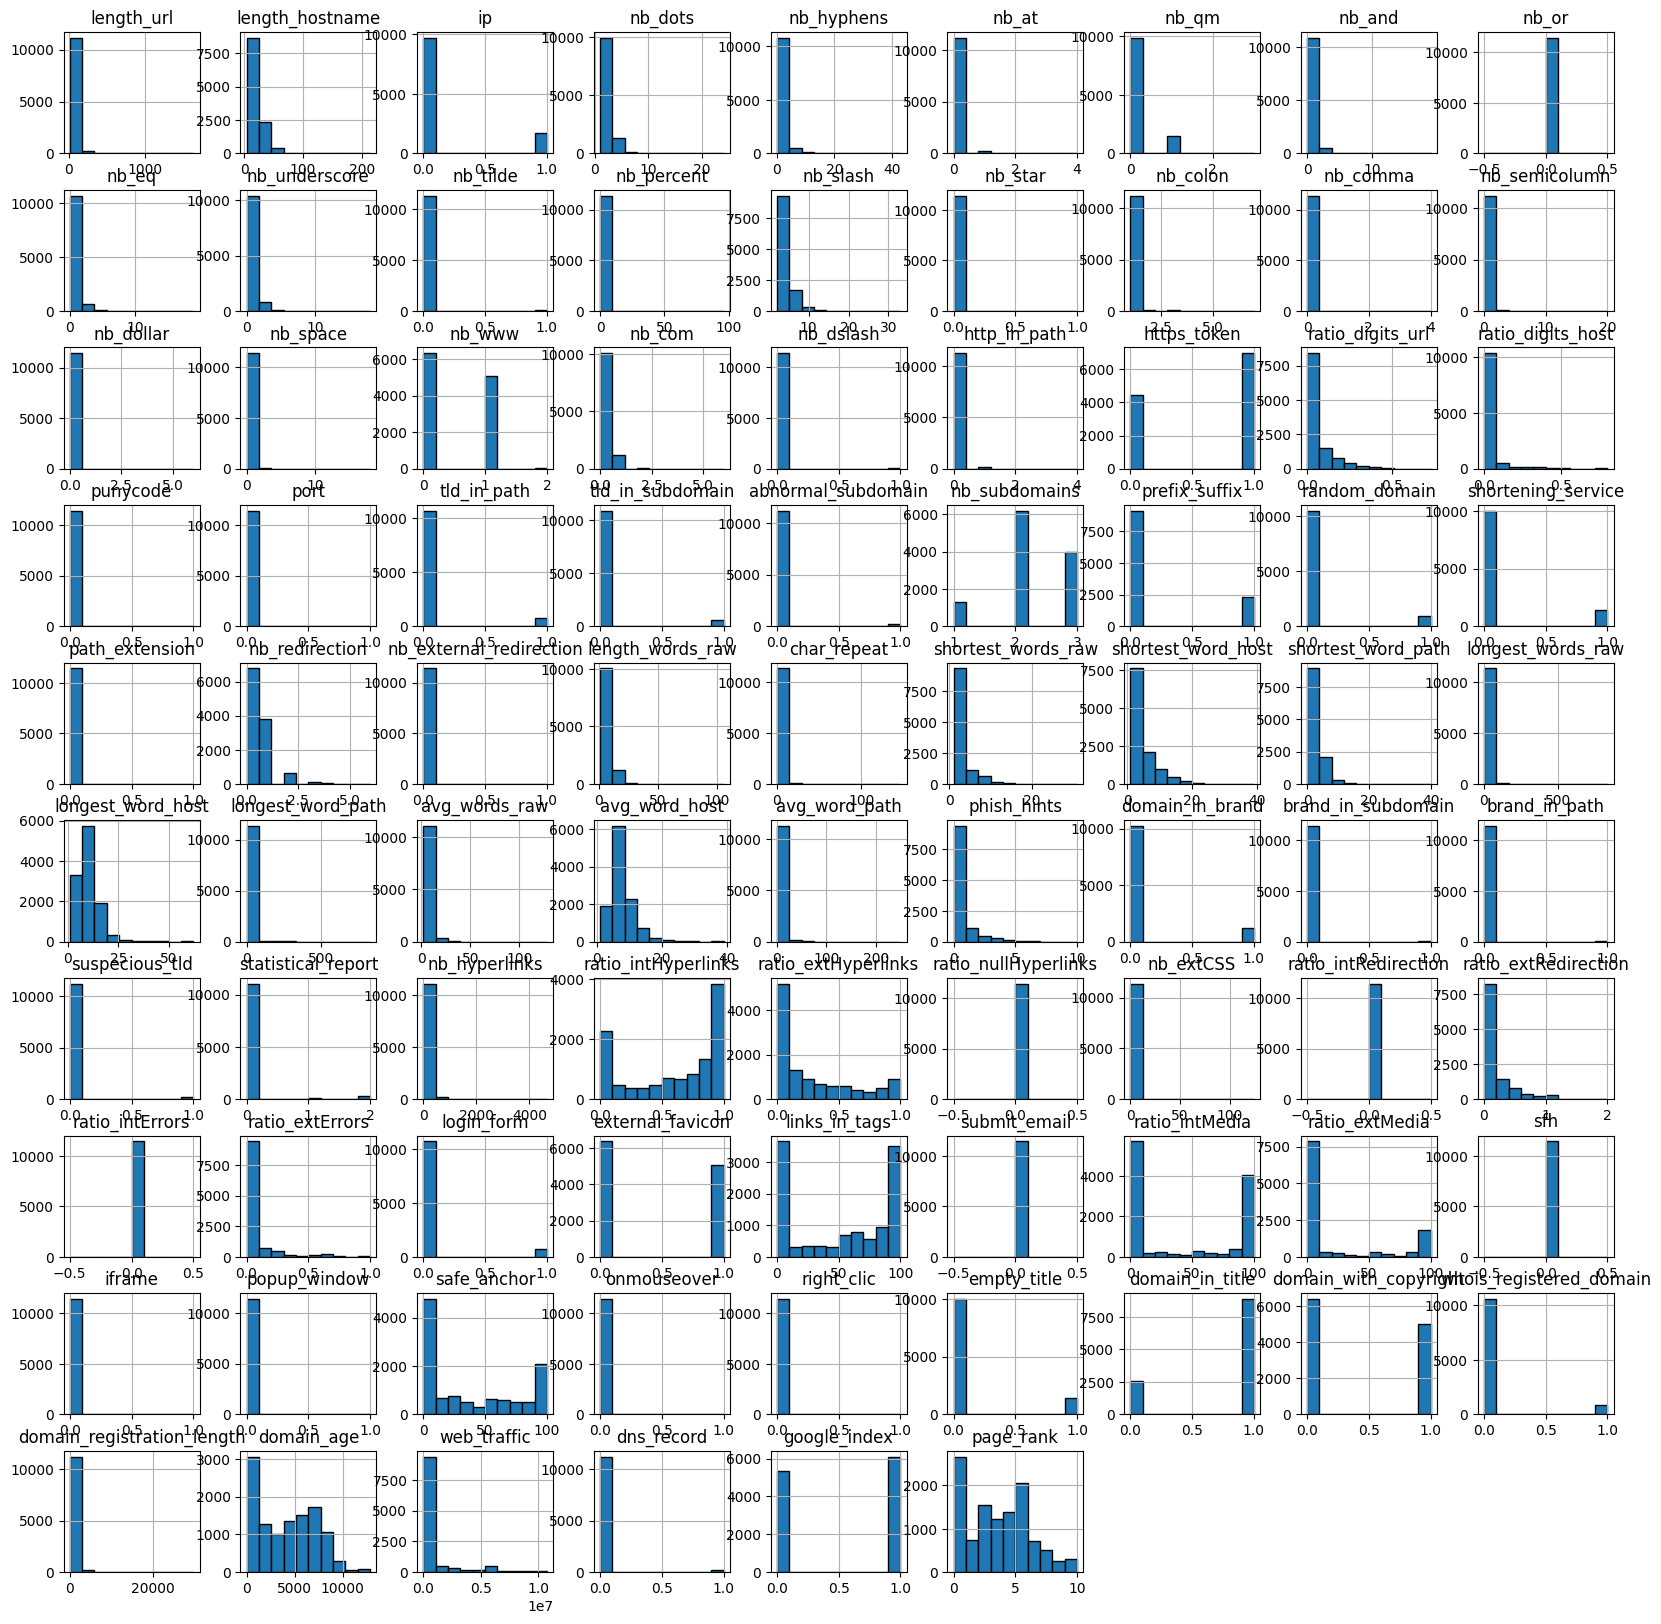

In [70]:
# Plotting Histogram
numerical_data.hist(figsize=(20,20),bins=10,edgecolor='black')
plt.title('Histogram example',y=1.02)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Many features are right-skewed, indicating potential preprocessing needs (e.g., log transformation).
Distribution plots also highlighted high concentration of values in specific ranges for features like ratio_digits_url.

# Pair Plot

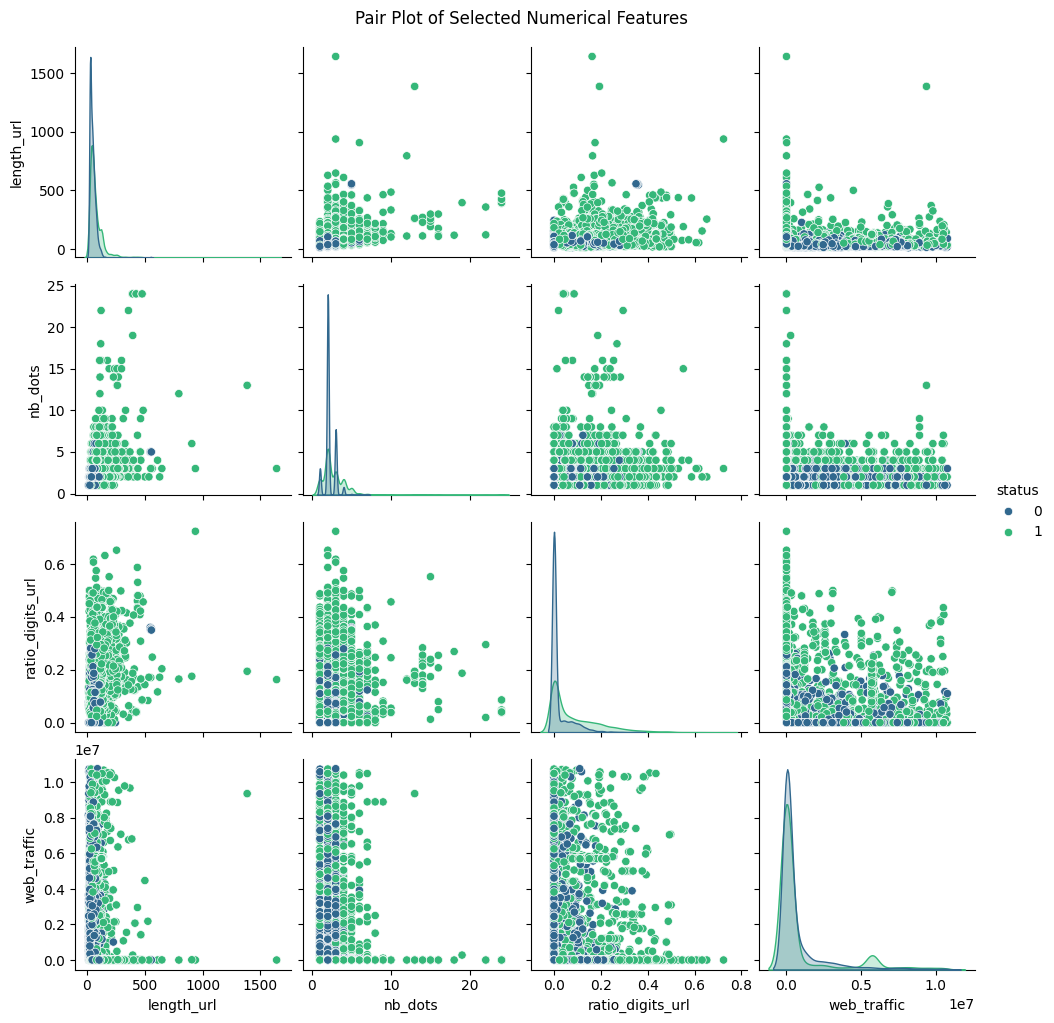

In [71]:
selected_features = ['length_url', 'nb_dots', 'ratio_digits_url', 'web_traffic', 'status']
# Plot pair plot
sns.pairplot(df[selected_features], hue='status', palette='viridis')
# Optional: Add title
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02)
plt.show()

The pairplot shows some visual separation between phishing and legitimate classes in selected features — especially in ratio_digits_url and web_traffic. That means these features might be strong indicators for classification.

# ✅ Insights & Recommendations  
# Key Findings:   
Several numerical features display non-normal distributions and contain outliers, which could affect model performance if not addressed.

Features like ratio_digits_url and web_traffic show clear separation between classes and can act as strong indicators for phishing detection.

The target column status is well-balanced, which is ideal for binary classification models and ensures fair learning across both classes.

# Recommended Actions:
Normalize or transform skewed numerical features (e.g., using log or power transforms) to reduce the effect of extreme values.

Scale features using standardization (e.g., MinMaxScaler or StandardScaler) to ensure uniform treatment by algorithms.

Use feature selection techniques (e.g., correlation thresholding, mutual information, or tree-based feature importance) to focus on the most predictive variables.

Check for multicollinearity using correlation matrices or VIF to avoid redundant features

# Checking duplicates

In [72]:
duplicates=df.duplicated()


In [73]:
duplicates.value_counts()

False    11430
Name: count, dtype: int64

Label Encoding was applied to the url column to convert categorical values into numeric form. One-Hot Encoding was avoided because it would have significantly increased the number of columns due to the high number of unique URLs. Label Encoding keeps the dataset compact and efficient without adding unnecessary dimensions.

In [74]:
# label Encoding Url Column

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['url']=LE.fit_transform(df['url'])


df['url'].value_counts()

url
1065     2
4501     1
10779    1
1315     1
9201     1
        ..
6539     1
819      1
9629     1
5956     1
62       1
Name: count, Length: 11429, dtype: int64

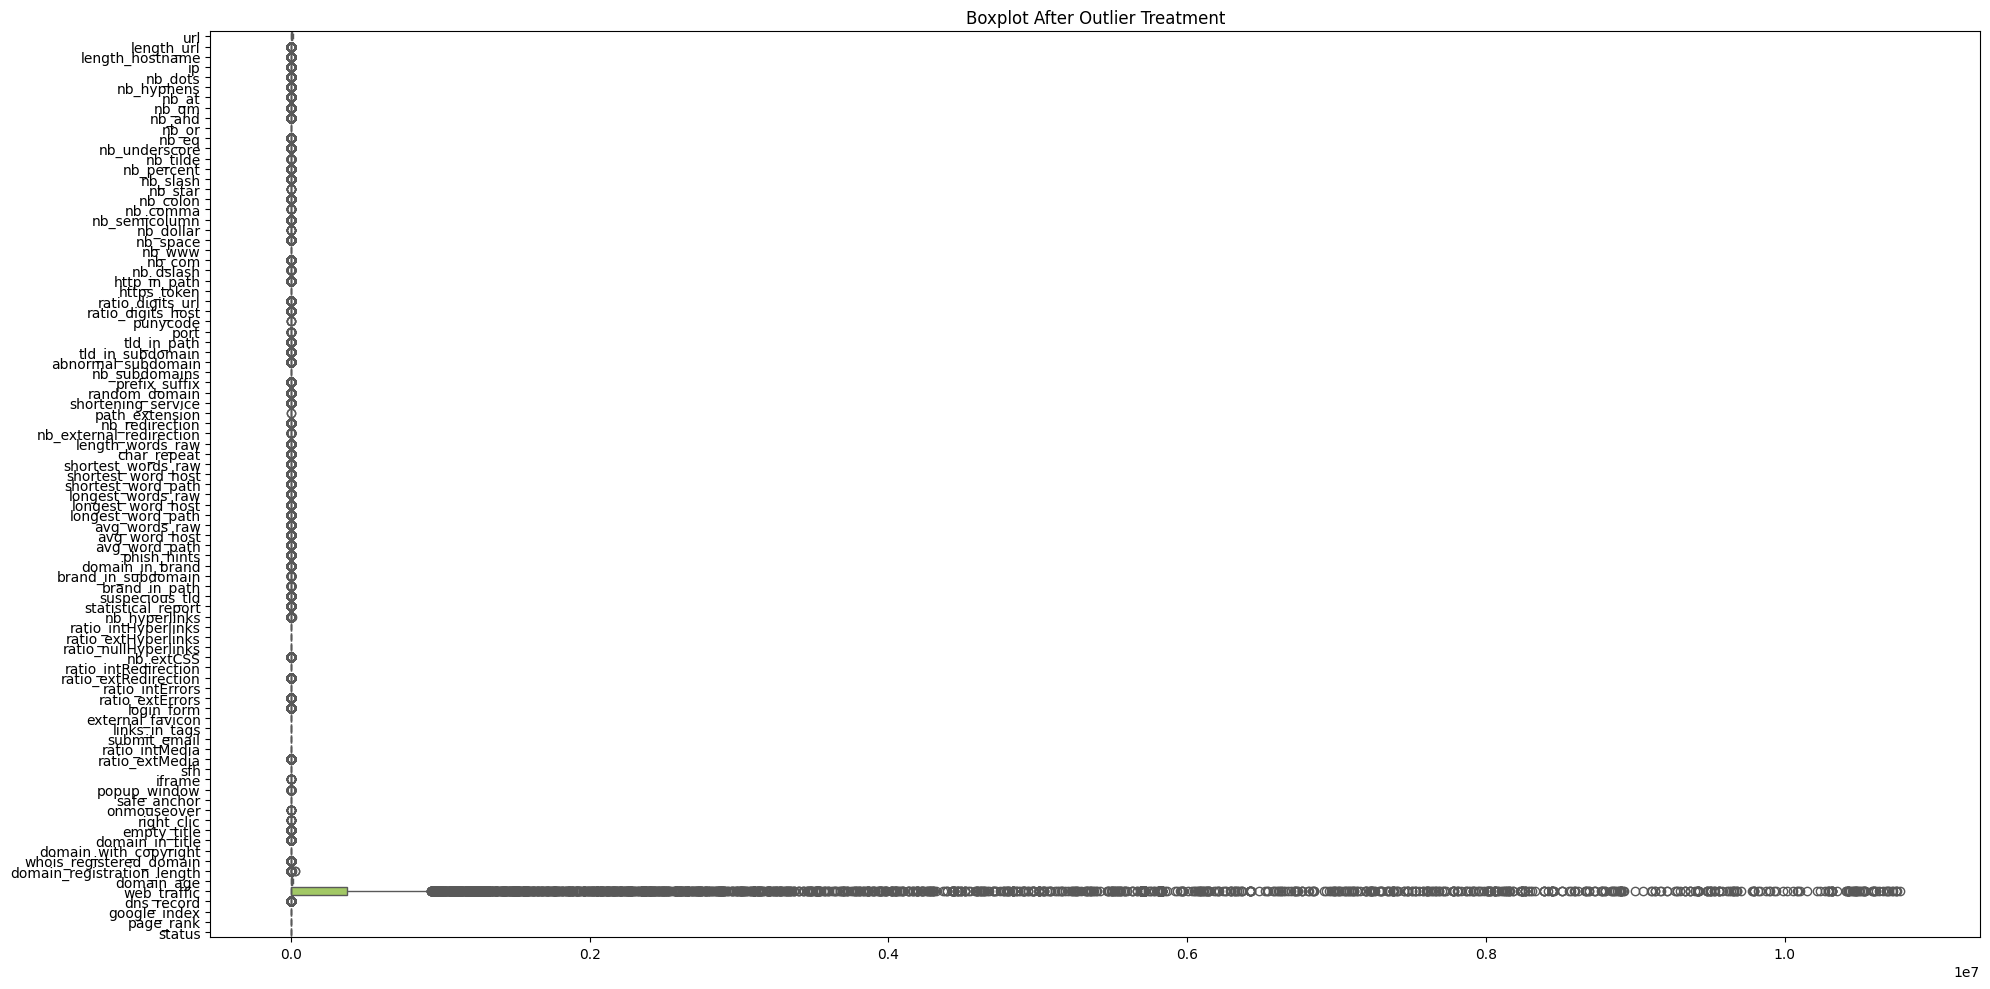

In [75]:
# Checking Outliers Using Boxplot
# Set figure size
plt.figure(figsize=(20, 10))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [76]:
# Removing Outliers
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'url'.
Replaced 620 outliers in 'length_url' with median.
Replaced 775 outliers in 'length_hostname' with median.
Replaced 1721 outliers in 'ip' with median.
Replaced 567 outliers in 'nb_dots' with median.
Replaced 1371 outliers in 'nb_hyphens' with median.
Replaced 245 outliers in 'nb_at' with median.
Replaced 1555 outliers in 'nb_qm' with median.
Replaced 761 outliers in 'nb_and' with median.
No outliers found in 'nb_or'.
Replaced 1564 outliers in 'nb_eq' with median.
Replaced 1695 outliers in 'nb_underscore' with median.
Replaced 76 outliers in 'nb_tilde' with median.
Replaced 355 outliers in 'nb_percent' with median.
Replaced 401 outliers in 'nb_slash' with median.
Replaced 8 outliers in 'nb_star' with median.
Replaced 197 outliers in 'nb_colon' with median.
Replaced 24 outliers in 'nb_comma' with median.
Replaced 248 outliers in 'nb_semicolumn' with median.
Replaced 11 outliers in 'nb_dollar' with median.
Replaced 210 outliers in 'nb_space' with median.
No out

In [77]:
# Checking Correlation
df.corr()['status']

url                          -0.290971
length_url                    0.217898
length_hostname               0.105306
ip                                 NaN
nb_dots                       0.109748
nb_hyphens                    0.158158
nb_at                              NaN
nb_qm                              NaN
nb_and                             NaN
nb_or                              NaN
nb_eq                              NaN
nb_underscore                      NaN
nb_tilde                           NaN
nb_percent                         NaN
nb_slash                      0.201618
nb_star                            NaN
nb_colon                           NaN
nb_comma                           NaN
nb_semicolumn                      NaN
nb_dollar                          NaN
nb_space                           NaN
nb_www                       -0.443468
nb_com                             NaN
nb_dslash                          NaN
http_in_path                       NaN
https_token              

# **A Ranked list of features based on Variance Inflation Factor (VIF)**

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Checking VIF:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('status',axis = 1))

,features,VIF_Values
0,url,9.42
25,https_token,7.70
47,longest_word_path,5.86
33,nb_subdomains,5.36
46,longest_word_host,5.18
4,nb_dots,4.88
58,ratio_intHyperlinks,4.49
45,longest_words_raw,4.38
21,nb_www,4.21
50,avg_word_path,4.16


In [79]:
# Spliting Data into Independent And target Column
X=df.drop(columns='status')
y=df['status']


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=42)

In [81]:
X_train_original = X_train.copy()

# **Scaling Technique:- Robust Scaler**
Robust Scaler was used to handle outliers effectively, as boxplots showed many extreme values in the numerical features. It scales data based on the median and IQR, making it less sensitive to outliers compared to StandardScaler or MinMaxScaler.

In [82]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

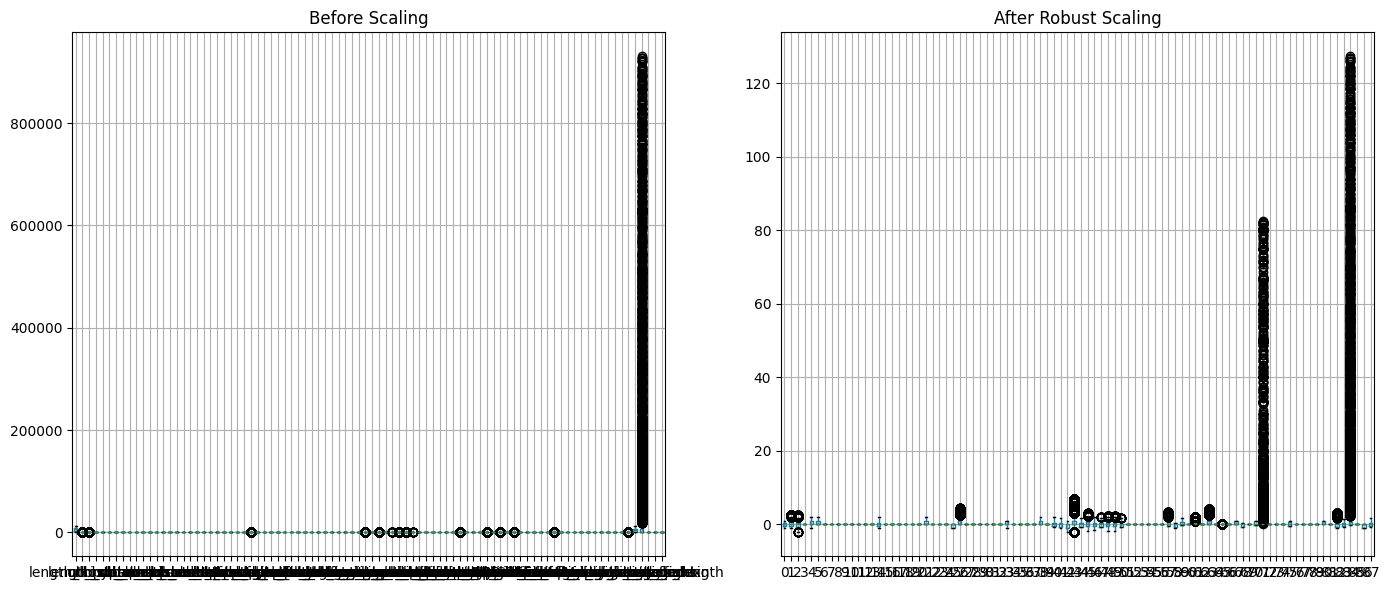

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
X_train_scaled=X_train.copy()
# If X_train is a NumPy array, convert it to a DataFrame
X_train_df = pd.DataFrame(X_train_original)
X_train_scaled_df = pd.DataFrame(X_train_scaled)

# Plot before and after scaling side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
X_train_df.boxplot()
plt.title("Before Scaling")

plt.subplot(1, 2, 2)
X_train_scaled_df.boxplot()
plt.title("After Robust Scaling")

plt.tight_layout()
plt.show()


# **Appling PCA For Dimension Reduction**
**Displaying Variance Ratio**

In [84]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
# Using PCA Concept:

# Step 1: Standardize the data

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')

pca_df


Explained Variance Ratio: [0.57046592 0.970943  ]
Number of components selected: 2


,PC1,PC2,status
0,-7.873171,-5.366775,0
1,-6.311023,14.559213,1
2,-7.736537,-5.395951,1
3,5.910682,-2.885161,0
4,-6.772865,-5.403439,0
...,...,...,...
11425,-1.094859,73.295599,0
11426,-7.901367,-5.380939,1
11427,-7.912587,-5.342337,0
11428,-7.664649,-5.369196,0


# **Training Machine Learning Model**


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=pca_df.drop(columns='status')
y=pca_df['status']

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,random_state=42)

# **Logistic Regression**

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

accuracy_lr=accuracy_score(y_test,y_pred_lr)
print("Accuracy",(accuracy_lr)*100,'%')

Accuracy 60.96209912536443 %


# **Random Forest Classifier**

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)

accuracy_rfc=accuracy_score(y_test,y_pred_rfc)
print("Accuracy:",(accuracy_rfc)*100,"%")

Accuracy: 84.3731778425656 %


# **Decission Tree Classifier**

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # Make sure this is the function

# Train the model
dfc = DecisionTreeClassifier()
dfc.fit(X_train, y_train)

# Predict
y_pred_dc = dfc.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dc)
print("Accuracy:", (accuracy)*100,"%")


Accuracy: 80.29154518950438 %
